# Holt Linear Or Double  Exponential Smoothing -- DES

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\komal\Downloads\Sales_Electronic.csv")
data.head()

,Date,Sales
0,01-01-2017,302
1,01-02-2017,332
2,01-03-2017,338
3,01-04-2017,350
4,01-05-2017,380


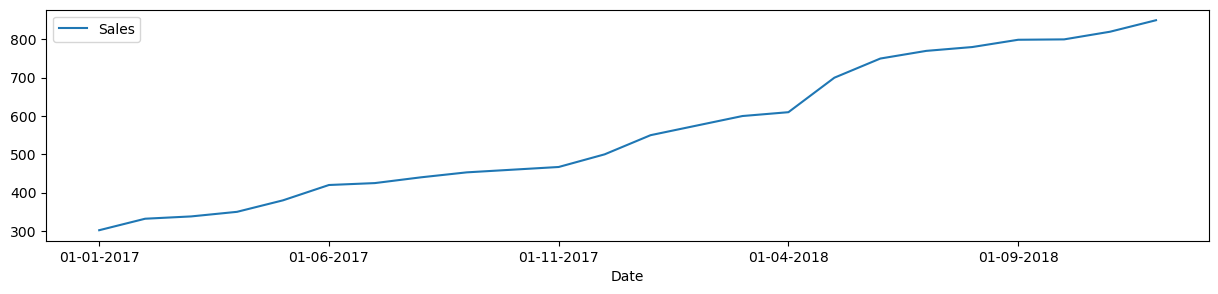

In [4]:
data.plot.line(x = 'Date',y = 'Sales',figsize=(15,3))
plt.show() # pattern = Trend - upward

In [5]:
data2 = data.set_index("Date")
data2.head()

,Sales
Date,
01-01-2017,302
01-02-2017,332
01-03-2017,338
01-04-2017,350
01-05-2017,380


#### Manual Model

* Parameter
   * Alpha ( Smoothing) = 0.8 & beta ( Trend ) = 0.3
* Initial Forecast
   *  ( Smoothing) = 302 ( Y1 ) & Initial ( Trend ) = 30 ( y2 - y1)

In [8]:
model2 = Holt(data2,initial_level=302,initial_trend=30,initialization_method='known').fit(smoothing_level=0.2,smoothing_trend=0.9)
model2.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.9,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 302.0,
 'initial_trend': 30.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [9]:
data2["Forecast"] = round(model2.fittedvalues)
data2.head()

,Sales,Forecast
Date,,
01-01-2017,302,332.0
01-02-2017,332,351.0
01-03-2017,338,368.0
01-04-2017,350,378.0
01-05-2017,380,383.0


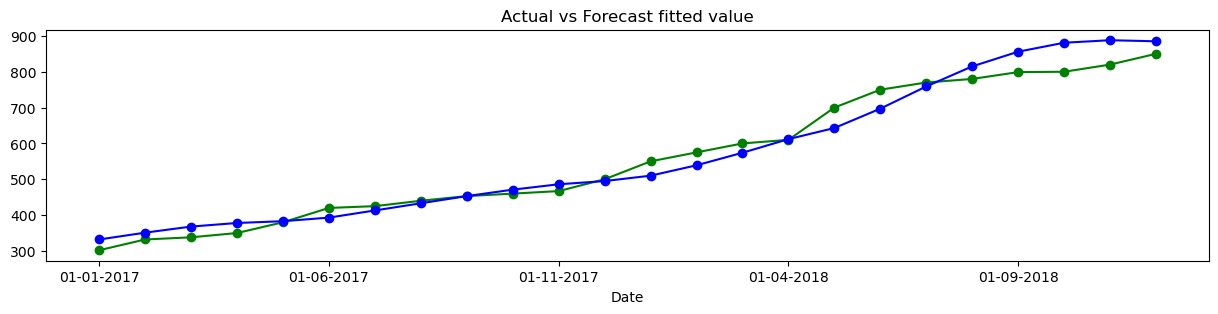

In [10]:
plt.title("Actual vs Forecast fitted value")
data2.Sales.plot(marker='o', color='green')
data2.Forecast.plot(marker='o',  color='blue',figsize=(15,3))
plt.show()

#### Future Forecast Value & Plot 

In [12]:
Forecast2 = round(model2.forecast(5),0)
Forecast2

24    882.0
25    886.0
26    890.0
27    894.0
28    898.0
dtype: float64

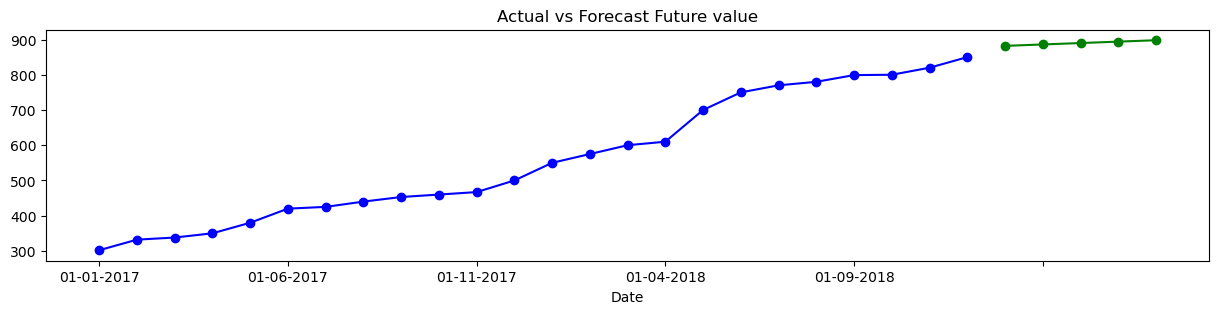

In [13]:
plt.title("Actual vs Forecast Future value")
Forecast2.plot(marker='o', color='green')
data2.Sales.plot(marker='o',  color='blue',figsize=(15,3))
plt.show()

#### Accuracy of Model

In [15]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Sales - data2.Forecast)/np.abs(data2.Sales))*100
mean_absolute_percentage_error

5.025584901012705

* Model is Good Fit on Dataset

# Auto model 

In [22]:
data=pd.read_csv(r"C:\Users\komal\Downloads\Sales_Electronic.csv")
data.head()

,Date,Sales
0,01-01-2017,302
1,01-02-2017,332
2,01-03-2017,338
3,01-04-2017,350
4,01-05-2017,380


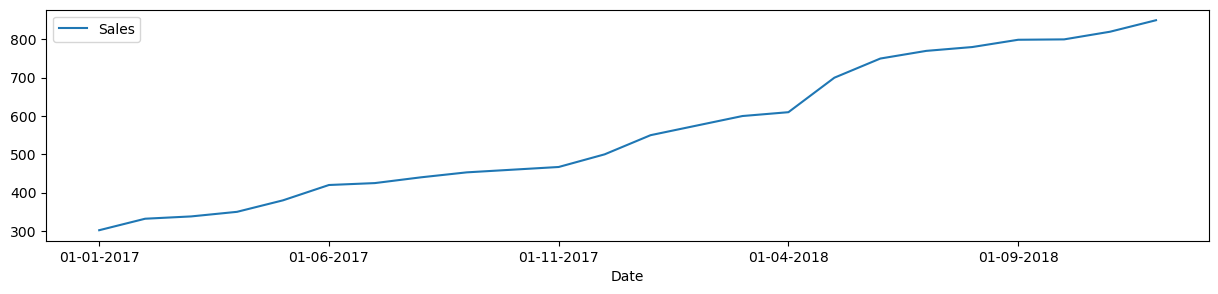

In [24]:
data.plot.line(x = 'Date',y = 'Sales',figsize=(15,3))
plt.show()

In [26]:
data2 = data.set_index("Date")
data2.head()

,Sales
Date,
01-01-2017,302
01-02-2017,332
01-03-2017,338
01-04-2017,350
01-05-2017,380


In [28]:
fit_auto = Holt(data2).fit(optimized=True) # lets software decide 
fit_auto.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.035635975811460635,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 302.0,
 'initial_trend': 30.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
data2["Forecast"] = round(fit_auto.fittedvalues)
data2.head()

,Sales,Forecast
Date,,
01-01-2017,302,332.0
01-02-2017,332,331.0
01-03-2017,338,361.0
01-04-2017,350,366.0
01-05-2017,380,378.0


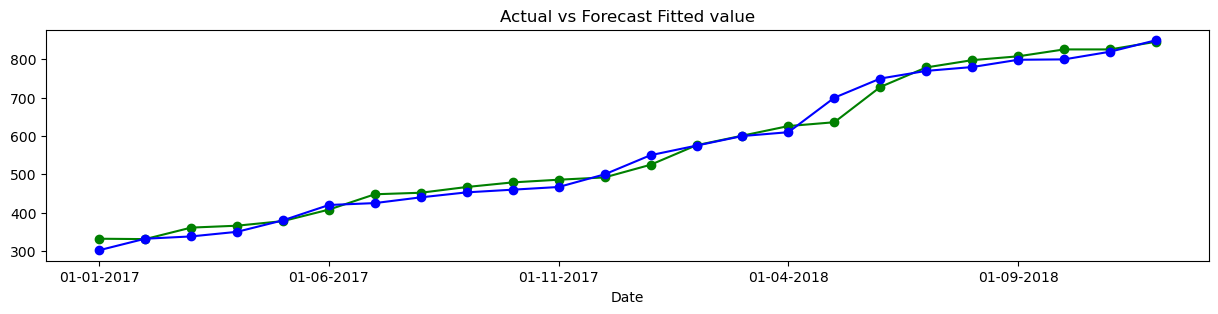

In [32]:
plt.title("Actual vs Forecast Fitted value")
data2.Forecast.plot(marker='o', color='green')
data2.Sales.plot(marker='o',  color='blue',figsize=(15,3))
plt.show()

#### Accuracy of Model

In [35]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Sales - data2.Forecast)/np.abs(data2.Sales))*100
mean_absolute_percentage_error

3.1109794006628517

#### Forecast Value & Plot 

In [38]:
Forecast2 = round(fit_auto.forecast(10))
Forecast2

24     876.0
25     903.0
26     929.0
27     955.0
28     981.0
29    1008.0
30    1034.0
31    1060.0
32    1087.0
33    1113.0
dtype: float64

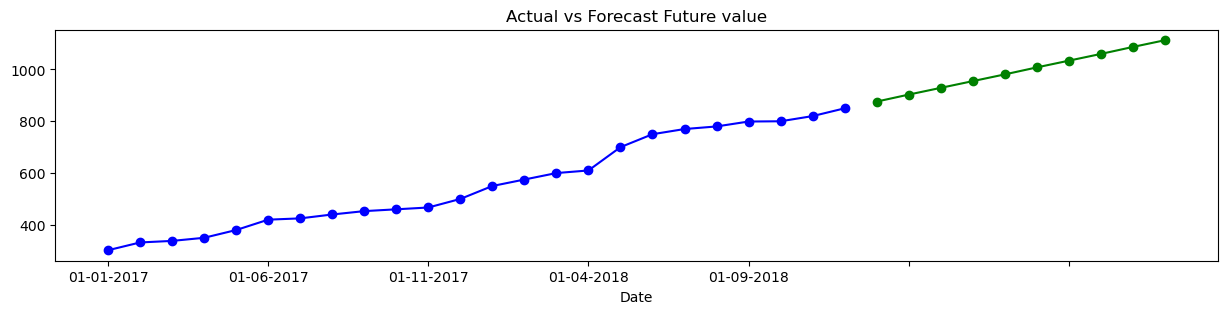

In [40]:
plt.title("Actual vs Forecast Future value")
Forecast2.plot(marker='o', color='green')
data2.Sales.plot(marker='o',  color='blue',figsize=(15,3))
plt.show()

#### Auto model is Best Model 